##A short description of each feature:

**User ID**: A unique identifier for each user.

**Gender**: Categorical variable indicating the gender of the user (Male/Female). This feature could be relevant for understanding potential gender-based patterns in purchasing behavior.

**Age**: Numerical variable representing the age of the user. Age is likely a significant factor in determining whether an individual makes a purchase, as different age groups may have distinct buying patterns.

**Estimated Salary**: Numerical variable indicating the estimated salary of the user. The salary might influence purchasing decisions, as individuals with higher salaries may have different spending behaviors.

**Purchased**: Binary variable (0 or 1) indicating whether the user made a purchase (1) or not (0). This is the target variable for modeling, representing the outcome you want to predict.

**Purpose of Modeling**:
The goal of the modeling appears to be predicting whether a user will make a purchase based on their gender, age, and estimated salary. This is a binary classification problem where the model will learn patterns from the historical data to classify users into two categories: those who made a purchase (1) and those who did not (0).

Link for dataset: https://www.kaggle.com/datasets/sobhanmohammadids/social-network-ads-dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [5]:
df.describe().style.format("{:.2f}")

,User ID,Age,EstimatedSalary,Purchased
count,400.00,400.00,400.00,400.00
mean,15691539.76,37.66,69742.50,0.36
std,71658.32,10.48,34096.96,0.48
min,15566689.00,18.00,15000.00,0.00
25%,15626763.75,29.75,43000.00,0.00
50%,15694341.50,37.00,70000.00,0.00
75%,15750363.00,46.00,88000.00,1.00
max,15815236.00,60.00,150000.00,1.00


In [6]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 5)


In [7]:
df = df.drop_duplicates()

In [8]:
# loop through each column and count the distinct values
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

User ID: 400 distinct values
Gender: 2 distinct values
Age: 43 distinct values
EstimatedSalary: 117 distinct values
Purchased: 2 distinct values


In [9]:
df.drop('User ID', axis = 1, inplace=True)

In [10]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

<ipython-input-13-a70b4e5f6fea>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Purchased", data=df, palette=colors)


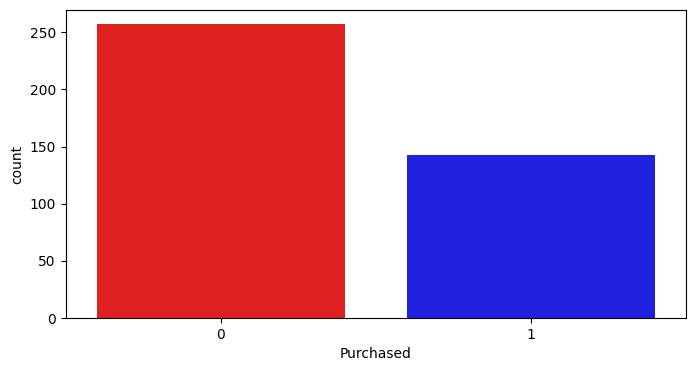

In [13]:
colors = ["red", "blue"]

plt.figure(figsize=(8, 4))
sns.countplot(x="Purchased", data=df, palette=colors)
plt.show()

 Number customers purchased from social networking advertisment is far less that total customers viewed the advertisement.

<ipython-input-14-62718f8f5151>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='Purchased', col='Gender', kind='count', data=df,palette=colors);


<Figure size 800x400 with 0 Axes>

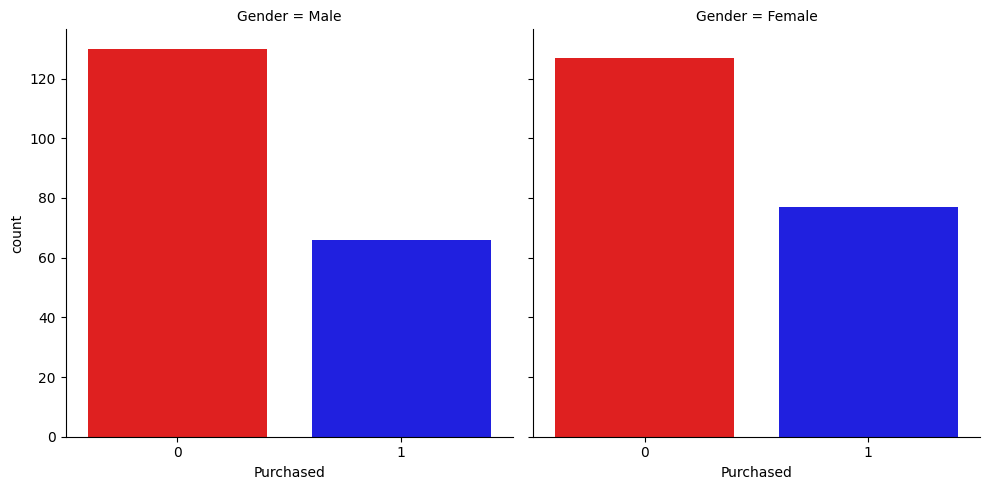

In [14]:
# Visualization of Target with respect to Gender¶
plt.figure(figsize=(8, 4))
sns.catplot(x='Purchased', col='Gender', kind='count', data=df,palette=colors);
plt.show()

In [15]:
cross_tab = pd.crosstab(df.Gender, df.Purchased, normalize="index")
styled_table = cross_tab.style.background_gradient(cmap='crest', axis=1)\
                                .set_properties(**{'color': 'black', 'border-color': 'white'})

styled_table

Purchased,0,1
Gender,,
Female,0.622549,0.377451
Male,0.663265,0.336735


<Axes: xlabel='Age', ylabel='Count'>

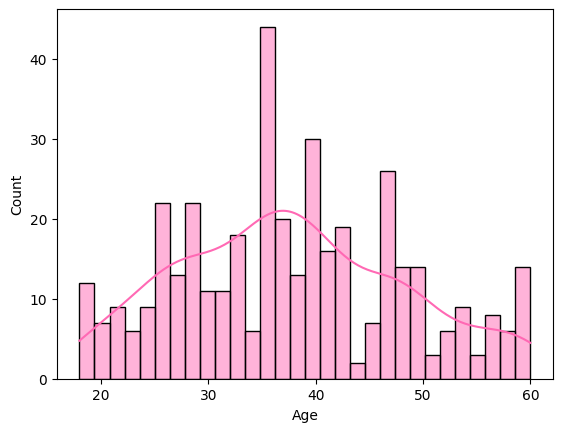

In [16]:
# Visualisation of Age and Estimated Salary¶
sns.histplot(df['Age'],kde=True,color='hotpink',bins=30)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

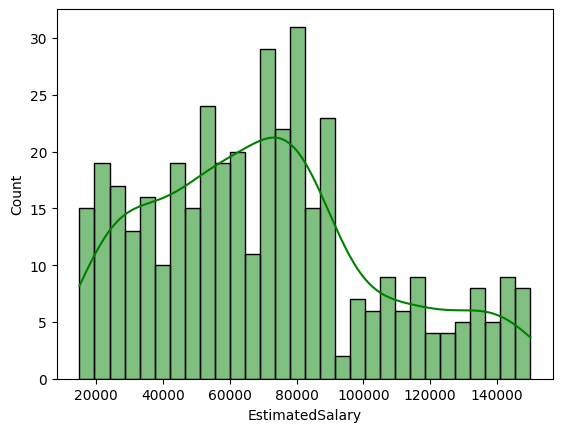

In [17]:
sns.histplot(df['EstimatedSalary'],kde=True,color='green',bins=30)

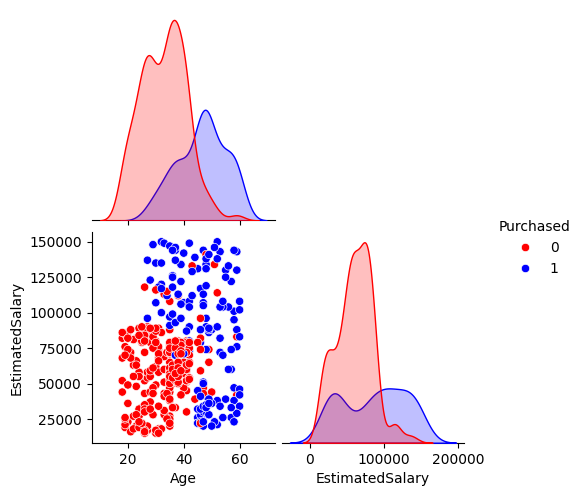

In [18]:
sns.pairplot(df , hue = 'Purchased',palette=colors,corner=True )

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

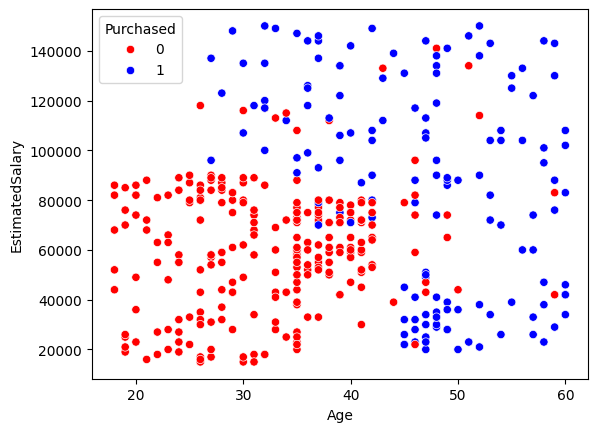

In [19]:
# Scatter Plot of Age and Estimated Salary with respect to Target

sns.scatterplot(x = 'Age',y = 'EstimatedSalary', data = df, hue = 'Purchased', palette =colors)

In [20]:
# Encoding Categorical Data

df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [21]:
df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [22]:
# splitting Dataset
X = df.drop('Purchased', axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# feature scaling

# Extracting the "Gender_Male" column
gender_male_train = X_train['Gender_Male']
gender_male_test = X_test['Gender_Male']
X_train = X_train.drop('Gender_Male', axis=1)
X_test = X_test.drop('Gender_Male', axis=1)

# List of columns to scale
cols_to_scale = X_train.columns

# Scaling the data
stan_scaler = StandardScaler()
X_train_scaled = stan_scaler.fit_transform(X_train)
X_test_scaled = stan_scaler.transform(X_test)

# Reintroducing the "Gender_Male" column to the data
X_train_scaled = pd.DataFrame(X_train_scaled, columns=cols_to_scale)
X_train_scaled['Gender_Male'] = gender_male_train

X_test_scaled = pd.DataFrame(X_test_scaled, columns=cols_to_scale)
X_test_scaled['Gender_Male'] = gender_male_test


In [24]:
# Displaying the scaled data
print(X_train_scaled)
print(X_test_scaled)

          Age  EstimatedSalary  Gender_Male
0   -1.066752        -0.386344          NaN
1    0.797535        -1.229939          1.0
2    0.110692         1.853544          0.0
3    0.601294        -0.909955          0.0
4    1.876859        -1.288118          1.0
..        ...              ...          ...
315 -1.361114        -1.259028          0.0
316 -1.164873        -1.026312          0.0
317  0.503174         1.824455          1.0
318  0.110692         0.195445          1.0
319 -0.576151         0.457250          1.0

[320 rows x 3 columns]
         Age  EstimatedSalary  Gender_Male
0   0.797535        -1.404475          1.0
1   2.073100         0.515429          NaN
2  -0.968632        -0.764507          NaN
3   0.993775         0.748145          NaN
4  -0.870512        -1.229939          NaN
..       ...              ...          ...
75 -0.281789        -0.589971          NaN
76  1.778738         1.824455          1.0
77  1.582498        -1.288118          0.0
78 -0.281789      

In [25]:
#KNN

# parameters for KNN
n_neighbors = 5  # number of neighbors
metric = 'euclidean'  # distance measure
p_value = 2  # parameter p for the Minkowski distance (for the 'Minkowski' measure)


In [26]:
# initialization and training of the KNN model
classifierKNN = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, p=p_value)
classifierKNN.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
# prediction on the test set
y_pred = classifierKNN.predict(X_test)

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[46  6]
 [ 8 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87        52
           1       0.77      0.71      0.74        28

    accuracy                           0.82        80
   macro avg       0.81      0.80      0.80        80
weighted avg       0.82      0.82      0.82        80


Accuracy Score: 0.825


In [ ]:
# the probabilities of predicted classes "1"
y_prob_knn = classifierKNN.predict_proba(X_test)[:, 1]

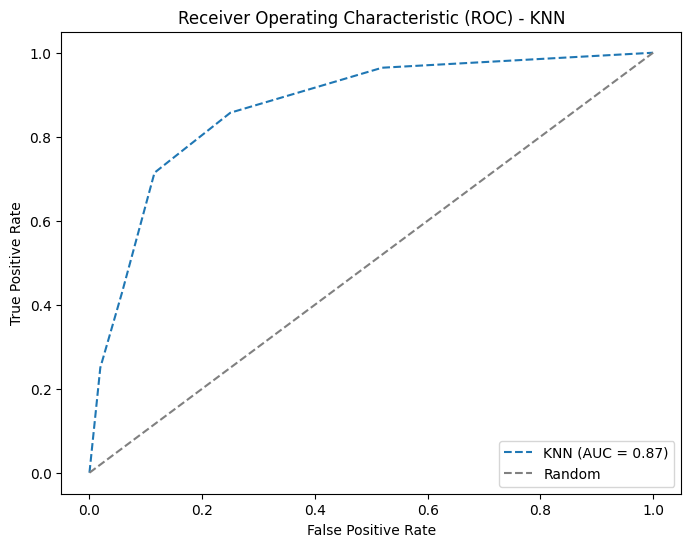

In [ ]:
# ROC curve

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) - KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# naive Bayes method
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# initialize and train a Naive Bayes model with your own priorities

priors = [0.4, 0.6]  # priors for classes
nb_classifier = GaussianNB(priors=priors)
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=[0.4, 0.6])

In [ ]:
# prediction on the test set
y_pred = nb_classifier.predict(X_test)

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[44  8]
 [ 1 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91        52
           1       0.77      0.96      0.86        28

    accuracy                           0.89        80
   macro avg       0.87      0.91      0.88        80
weighted avg       0.91      0.89      0.89        80


Accuracy Score: 0.8875


In [ ]:
# the probabilities of predicted classes "1"
y_prob_nb = nb_classifier.predict_proba(X_test)[:, 1]

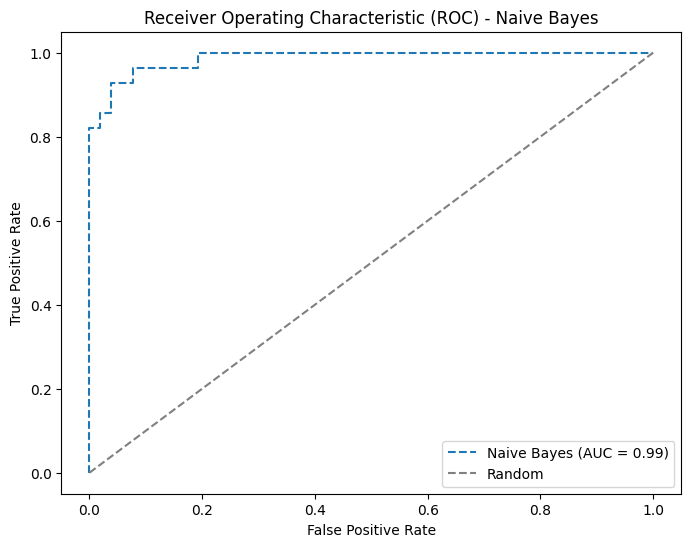

In [ ]:
# ROC curve
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) - Naive Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Support Vector Machine (SVM)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C_value = 1.0 # regularization parameter (cost)
kernel_type = 'linear' # kernel type

# initialization and training of the SVM model
svm_classifier = SVC(C=C_value, kernel=kernel_type)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
# prediction
y_pred = svm_classifier.predict(X_test)

In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[48  4]
 [ 8 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        52
           1       0.83      0.71      0.77        28

    accuracy                           0.85        80
   macro avg       0.85      0.82      0.83        80
weighted avg       0.85      0.85      0.85        80


Accuracy Score: 0.85


In [ ]:
# Retrieving the decision function scores
y_scores_svm = svm_classifier.decision_function(X_test)

# Manually converting scores to probabilities
# Assuming that positive class is labeled as 1
y_prob_svm = 1 / (1 + np.exp(-y_scores_svm))

# ROC curve
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

<ipython-input-127-9ba30cc0e18a>:6: RuntimeWarning: overflow encountered in exp
  y_prob_svm = 1 / (1 + np.exp(-y_scores_svm))


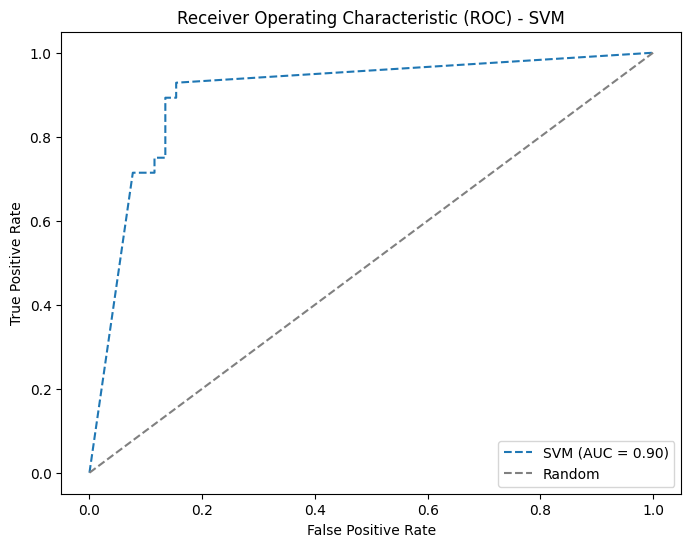

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('Receiver Operating Characteristic (ROC) - SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

 this analysis, three popular machine learning algorithms, K-Nearest Neighbors (KNN), Naive Bayes, and Support Vector Machine (SVM), were applied to a given dataset for binary classification. The performance of each model was assessed using metrics such as accuracy, precision, recall, and F1-score.

1. K-Nearest Neighbors (KNN):

Accuracy Score: 82.5%
Strengths:
Simple and intuitive.
No assumption about the underlying data distribution.
Weaknesses:
Sensitive to irrelevant or redundant features.
Computationally expensive during prediction, especially with large datasets.
2. Naive Bayes:

Accuracy Score: 88.75%
Strengths:
Efficient and easy to implement.
Assumes independence between features, making it computationally efficient.
Weaknesses:
Assumes feature independence, which may not hold in all cases.
Sensitivity to outliers.
3. Support Vector Machine (SVM):

Accuracy Score: 85%
Strengths:
Effective in high-dimensional spaces.
Robust in handling complex decision boundaries.
Weaknesses:
Computationally expensive, especially with large datasets.
Choice of kernel and hyperparameters can impact performance.
Comparative Analysis:

Accuracy:

Naive Bayes achieved the highest accuracy (88.75%), followed by SVM (85%) and KNN (82.5%).
Precision and Recall:

Naive Bayes and SVM showed higher precision, recall, and F1-score for class 1 compared to KNN.
SVM demonstrated a balanced performance with good precision and recall for both classes.
Computational Complexity:

KNN is simple but computationally expensive during prediction.
Naive Bayes is computationally efficient but makes strong independence assumptions.
SVM is effective in high-dimensional spaces but can be computationally expensive, especially with large datasets.
Considerations for Model Selection:

Dataset Characteristics:

Choose KNN for simplicity and interpretability.
Choose Naive Bayes for efficiency and if independence assumptions align with the data.
Choose SVM for effective handling of complex decision boundaries.
Computational Resources:

Consider computational efficiency when dealing with large datasets; Naive Bayes might be preferable in such cases.
Balancing Precision and Recall:

Consider the balance between precision and recall based on the specific requirements of the problem; SVM demonstrated a balanced performance in this regard.
Ultimately, the choice of the best model depends on the unique characteristics of the dataset and the specific goals of the classification task. It may be beneficial to explore additional metrics and conduct further experimentation to fine-tune each model for optimal performance.


